In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# .shp => shapefile (very common geo format)
path = gpd.datasets.get_path("naturalearth_lowres")
path

'/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [3]:
# shapefile => really a collection of related files
!ls /home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [4]:
!ls /home/trh/.local/lib/python3.8/site-packages/geopandas/datasets

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [5]:
df = gpd.read_file(path).set_index("name")
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [7]:
type(df).__mro__ # method resolution order

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [8]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

<class 'shapely.geometry.polygon.Polygon'>


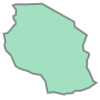

In [9]:
print(type(df["geometry"].iat[1]))
df["geometry"].iat[1]

<class 'shapely.geometry.multipolygon.MultiPolygon'>


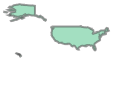

In [10]:
print(type(df["geometry"].at["United States of America"]))
df["geometry"].at["United States of America"]

<AxesSubplot:>

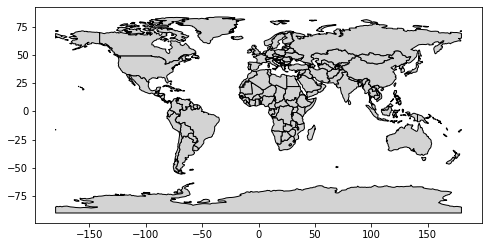

In [11]:
df.plot(figsize=(8,8), color="lightgray", edgecolor="black")

In [12]:
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

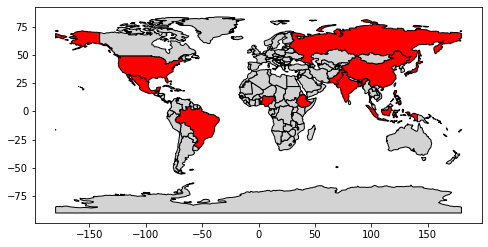

In [13]:
df["colorname"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "colorname"] = "red" # >100 mil
df.plot(figsize=(8,8), color=df["colorname"], edgecolor="black")

<AxesSubplot:>

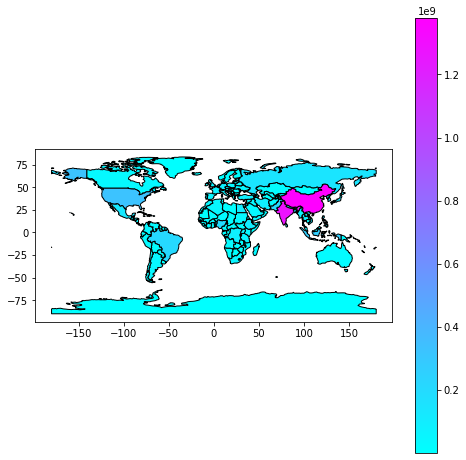

In [14]:
df.plot(figsize=(8,8), column="pop_est", edgecolor="black", cmap="cool", legend=True)

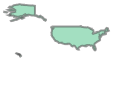

In [15]:
df["geometry"].at["United States of America"]

# Shapely

In [16]:
from shapely.geometry import Polygon, box, Point

<class 'shapely.geometry.polygon.Polygon'>


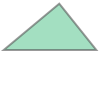

In [17]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])
print(type(p1))
p1

<class 'shapely.geometry.polygon.Polygon'>


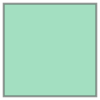

In [18]:
p2 = box(0, 0, 1, 1)
print(type(p2))
p2

<class 'shapely.geometry.point.Point'>


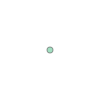

In [19]:
p3 = Point(5,5)
print(type(p3))
p3

<class 'shapely.geometry.polygon.Polygon'>


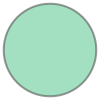

In [20]:
p4 = p3.buffer(2)
print(type(p4))
p4

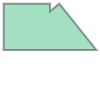

In [21]:
p1.union(p2) # OR

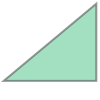

In [22]:
p1.intersection(p2) # AND

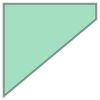

In [23]:
p2.difference(p1) # SUBTRACT

In [24]:
p1.intersects(p2)

True

True


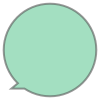

In [25]:
nearby_p3 = p3.buffer(6)
print(p1.intersects(nearby_p3))
p1.union(nearby_p3)

<AxesSubplot:>

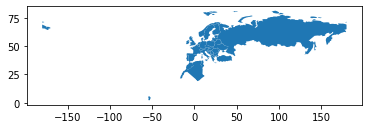

In [26]:
# draw a map of Europe
eur_window = box(-10.67, 34.5, 31.55, 71.05)

df[df.intersects(eur_window)].plot()

<AxesSubplot:>

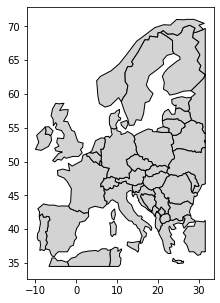

In [27]:
europe1 = df.intersection(eur_window)
europe1 = europe1[~europe1.is_empty]
europe1.plot(color="lightgray", edgecolor="black", figsize=(5,5))

/tmp/ipykernel_13149/1425897950.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe1.centroid.plot(ax=area, color="red")


<AxesSubplot:>

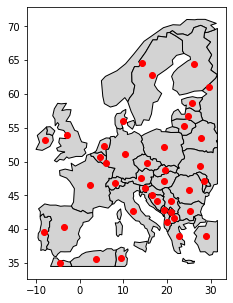

In [28]:
# Example: plot the centroid of each country
area = europe1.plot(color="lightgray", edgecolor="black", figsize=(5,5))
europe1.centroid.plot(ax=area, color="red")

In [29]:
# CRS: coordinate reference system
# re-project: change the CRS
europe1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

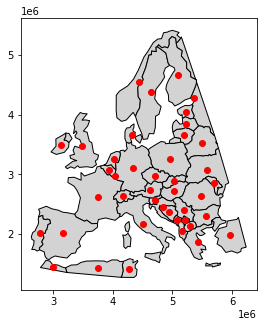

In [31]:
europe2 = europe1.to_crs("EPSG:3035")
area = europe2.plot(color="lightgray", edgecolor="black", figsize=(5,5))
europe2.centroid.plot(ax=area, color="red") # correct
#europe1.centroid.to_crs(europe2.crs).plot(ax=area, color="blue") # incorrect based on lat/lon

name
Russia              35.748174
Norway              61.455274
France              65.673811
Tunisia              6.540885
Algeria             21.165124
Sweden              79.446214
Belarus             27.622448
Ukraine             35.483088
Poland              40.759231
Austria             10.179604
Hungary             10.980058
Moldova              3.837658
Romania             27.621146
Lithuania            9.022101
Latvia               9.398691
Estonia              6.905922
Germany             45.923594
Bulgaria            12.119548
Greece              13.743985
Turkey              23.109344
Albania              3.185163
Croatia              6.570063
Switzerland          5.440201
Luxembourg           0.301516
Belgium              3.829997
Netherlands          5.264180
Portugal             9.802468
Spain               53.268425
Ireland              7.860299
Italy               34.685652
Denmark              6.168457
United Kingdom      34.202954
Slovenia             2.225310
Finla

/tmp/ipykernel_13149/4219276041.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(europe1.area)


<AxesSubplot:>

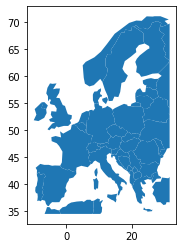

In [36]:
print(europe1.area)
europe1.plot()

name
France     216045.735320
Spain      193941.416516
Sweden     173962.955903
Germany    138002.030052
Finland    131750.182704
dtype: float64


<AxesSubplot:>

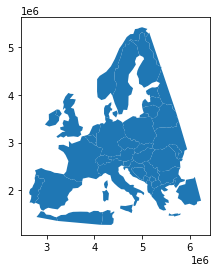

In [44]:
# sq mi only correct for countries that didn't get cropped to fit into the projection window
print((europe2.area / 1e6 / 2.59).sort_values(ascending=False).head()) # sq miles
europe2.plot()

In [34]:
europe1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
europe2.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

# Example: Map of Madison

* city limits
* water
* fire stations
* police stations

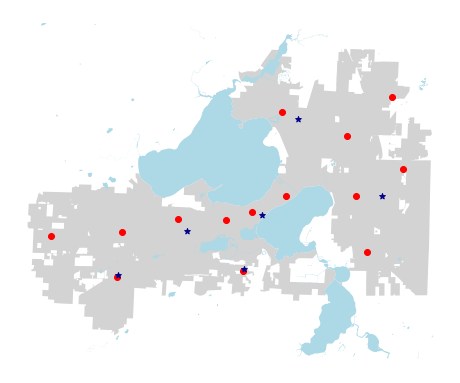

In [62]:
crs = "epsg:32616"
city = gpd.read_file("City_Limit.zip").to_crs(crs)
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(crs)
police = gpd.read_file("Police_Stations.zip").to_crs(crs)
streets = gpd.read_file("Street_Centerlines_and_Pavement_Data.geojson").to_crs(crs)

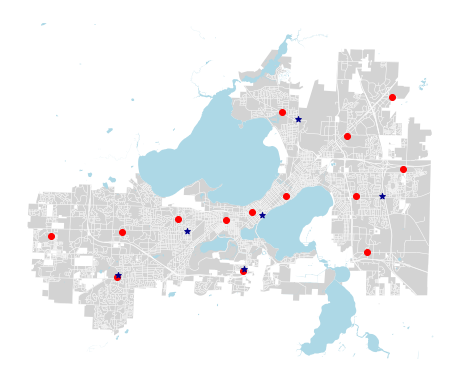

In [65]:
area = city.plot(color="lightgray", figsize=(8,8))
water.plot(color="lightblue", ax=area)
fire.plot(color="red", ax=area, zorder=10)
police.plot(color="darkblue", marker="*", ax=area, zorder=10)
streets.plot(ax=area, color="white", linewidth=0.5)

area.set_axis_off()

In [56]:
city.crs

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich